In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [6]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
x_train.shape,x_train[0].shape # 60k images 28 by 28 pixel ka

((60000, 28, 28), (28, 28))

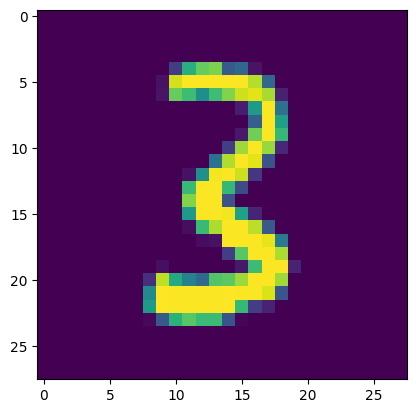

In [15]:
# showing the digit
import matplotlib.pyplot as plt
plt.imshow(x_train[50000])

In [18]:
# changing the range of data in 0-1 (useful for neural network)
x_train=x_train/255
x_test=x_test/255

In [19]:
#x_train[0]

In [25]:
# making model
model=Sequential()

In [26]:
model.add(Flatten(input_shape=(28,28))) # to convert our 2-d data into 1-d data
model.add(Dense(150,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 150)            │       117,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 40)             │         6,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,200 (485.16 KB)

 Trainable params: 124,200 (485.16 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
# fitting the model
history=model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5033 - loss: 1.5220 - val_accuracy: 0.8192 - val_loss: 0.5964
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8169 - loss: 0.5912 - val_accuracy: 0.8720 - val_loss: 0.4364
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8707 - loss: 0.4409 - val_accuracy: 0.9001 - val_loss: 0.3449
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8921 - loss: 0.3668 - val_accuracy: 0.9107 - val_loss: 0.3066
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9046 - loss: 0.3288 - val_accuracy: 0.9168 - val_loss: 0.2850
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9130 - loss: 0.2978 - val_accuracy: 0.9253 - val_loss: 0.2592
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9215 - loss: 0.2723 - val_accuracy: 0.9282 - val_loss: 0.2435
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9276 - loss: 0.243

In [31]:
# making prediction
y_prob=model.predict(x_test) # gives probabiltiy of digit

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [32]:
# taking the index having max probability
y_pred=y_prob.argmax(axis=1)

In [33]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [36]:
# calculating accuracy using cross_validation
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.9681

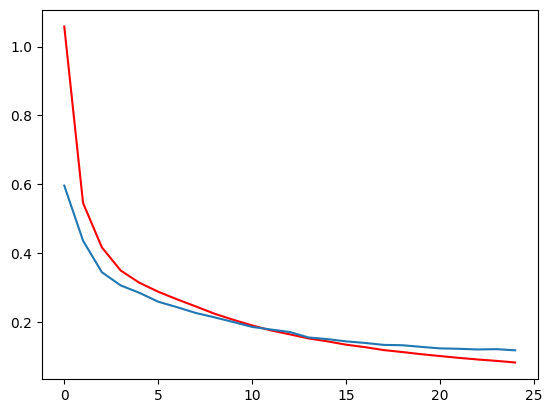

In [40]:
# plotting metrics
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'])

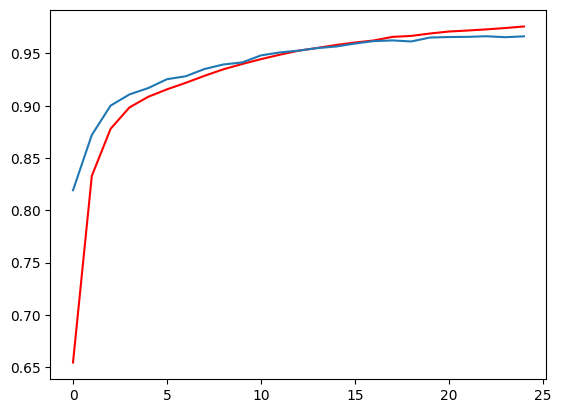

In [41]:
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'])

In [46]:
# making prediction
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


array([7])

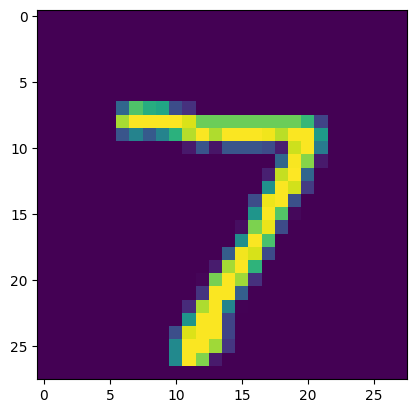

In [47]:
plt.imshow(x_test[0])